## 1. Problem Statement 

This project understand how the Student's Performance (Test Score's) is affected by other variables such as Gender, Ethinicity, Parental level of education, Lunch & Test Preparation Course.

## 2. Data Collection

Dataset Source = From Kaggle (https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?resource=download)

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore') 

### Import the CSV Data as pandas Dataframe

In [42]:
df = pd.read_csv('data/stud.csv')

### Show top 5 records

In [43]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### Shape of Dataset

In [44]:
df.shape

(1000, 8)

## Dataset Information

1. gender : sex of students (Male/Female)
2. race/ethinicity : ethinicity of students --> (Group A, B, C, D, E)
3. parental level of education : parent's final education (BHigh scool, College, Bachelor's Degree, Master's degree, Etc.)
4. lunch : Having a lunch before test (standard , free/ reduced)
5. test preparation course : complete or not complete before test
6. math score
7. reading score
8. writing score

### 3. Data checks to Perform

1. Check Missing Values
2. Check duplicates
3. Check datatypes
4. Check number of unique value in each column
5. Check statastics of dataset
6. Check various categories present in the different categorical column

### 3.1 Check Missing values

In [46]:
df.isna().sum()  ## There is no misiing values

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

### 3.2 Check Duplicates

In [47]:
df.duplicated().sum() ## There is no duplicates 

0

### 3.3 Check Datatypes

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### 3.4 Check number of unique value in each column

In [49]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

### 3.5 Check Statastics of dataset

In [50]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


### Insights

1. From above description of numerical data, all means are very close to each other --> Between 66 to 68.05
2. All standard deviations are also closed - 14.6 to 15.19
3. While there is a minimum score 0 for math, for writing minimum is much higher = 10, and for reading myet higher = 17

### 3.7 Exploring data

In [51]:
print('Categories in Gender variable:   ',end=" " )
print(df['gender'].unique())

print('Categories in Race/Ethnicity variable:   ',end=" " )
print(df['race/ethnicity'].unique())

print('Categories in Parental Level of Education variable:   ',end=" " )
print(df['parental level of education'].unique())

print('Categories in Lunch variable:   ',end=" " )
print(df['lunch'].unique())

print('Categories in Test Preparation Course variable:   ',end=" " )
print(df['test preparation course'].unique())


Categories in Gender variable:    ['female' 'male']
Categories in Race/Ethnicity variable:    ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in Parental Level of Education variable:    ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in Lunch variable:    ['standard' 'free/reduced']
Categories in Test Preparation Course variable:    ['none' 'completed']


In [52]:
# Define Numerical & categorical columns

numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# Print Columns

print(f" We have {len(numeric_features)} Numerical Features : {numeric_features}")
print(f" \n We have {len(categorical_features)} Categorical Features : {categorical_features}")


 We have 3 Numerical Features : ['math score', 'reading score', 'writing score']
 
 We have 5 Categorical Features : ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


### 3.8 Adding Columns for Total score & Average Score

In [53]:
df['total_score'] = df['math score'] + df['reading score'] + df['writing score']
df['average'] = df['total_score']/3
df.head(2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333


In [54]:
reading_full=df[df['reading score'] == 100]['average'].count()
writing_full=df[df['writing score'] == 100]['average'].count()
math_full=df[df['math score'] == 100]['average'].count()

print(f"Number of Students with full marks in Math : {math_full}")
print(f"Number of Students with full marks in Writing : {writing_full}")
print(f"Number of Students with full marks in Reading : {reading_full}")

Number of Students with full marks in Math : 7
Number of Students with full marks in Writing : 14
Number of Students with full marks in Reading : 17


In [56]:
reading_less_20=df[df['reading score'] <= 20]['average'].count()
writing_less_20=df[df['writing score'] <= 20]['average'].count()
math_less_20=df[df['math score'] <= 20]['average'].count()

print(f"Number of Students with Less than 20 marks in Math : {math_less_20}")
print(f"Number of Students with Less than 20 marks in Writing : {writing_less_20}")
print(f"Number of Students with Less than 20 marks in Reading : {reading_less_20}")

Number of Students with Less than 20 marks in Math : 4
Number of Students with Less than 20 marks in Writing : 3
Number of Students with Less than 20 marks in Reading : 1


### Insights

1. From above value we get students have performed the worst in Maths
2. Best performance is in reading section

## 4. Exploring Data

### 4.1 Visualize average score distribution to make some conclusion

1. Histogram
2. Kernel Distribution function (KDE)

### 4.1.1 Histogram & KDE

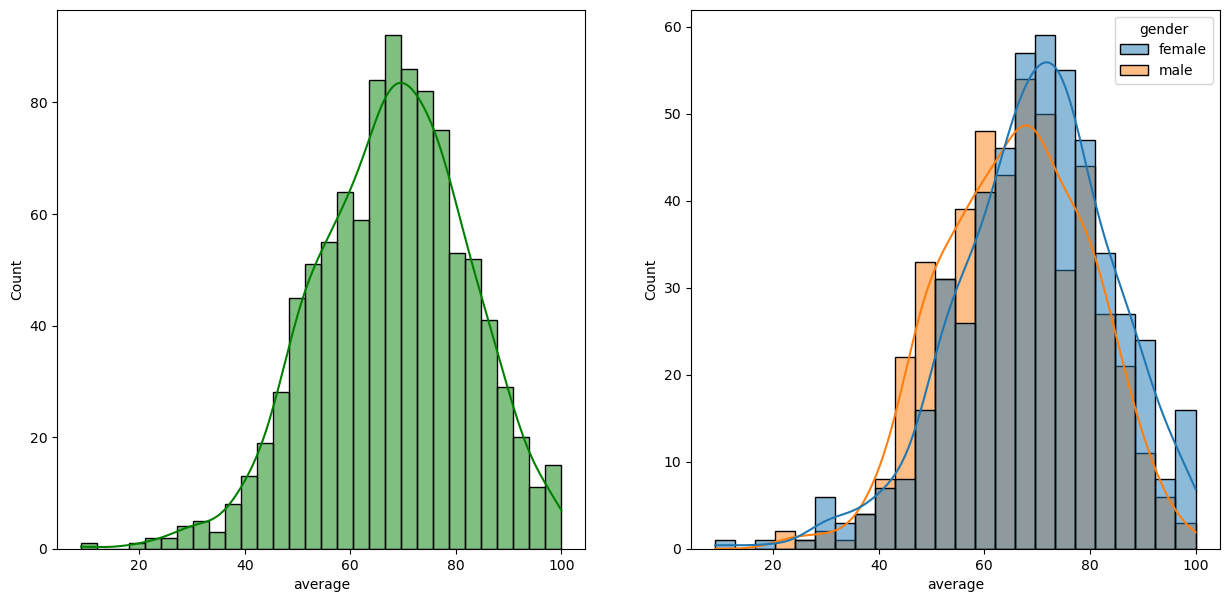

In [62]:
fig, axs = plt.subplots(1, 2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df, x='average', bins=30, kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df, x='average', kde=True, hue='gender')
plt.show()

### Insights

1. Female students tend to performs well than Male students

### 4.2 Visualize Total score distribution to make some conclusion

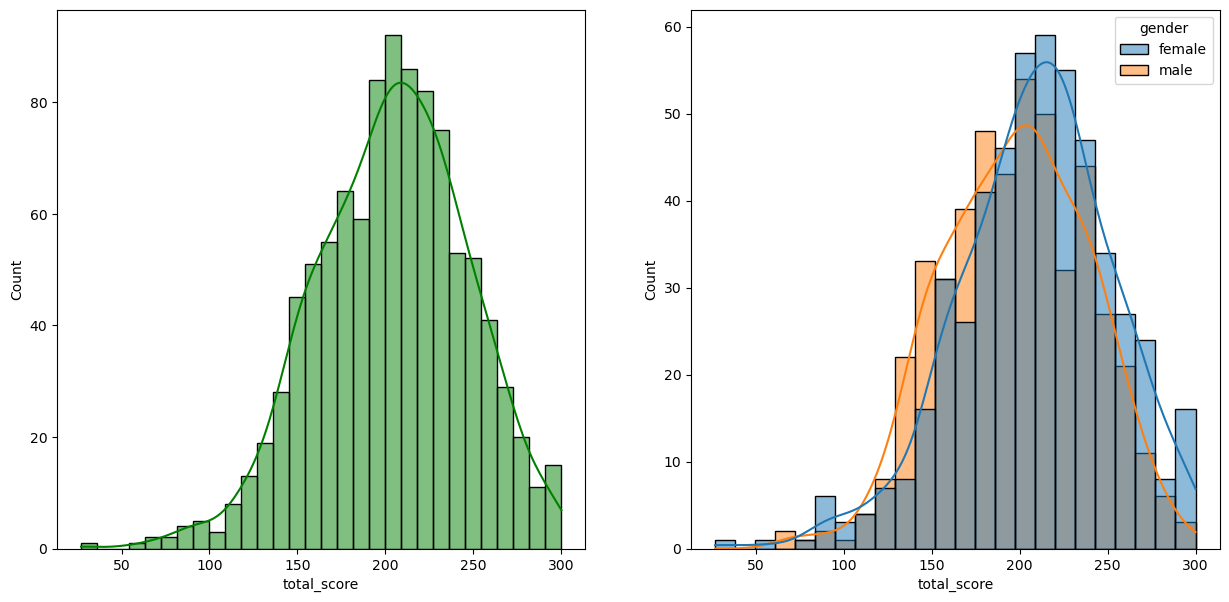

In [63]:
fig, axs = plt.subplots(1, 2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df, x='total_score', bins=30, kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df, x='total_score', kde=True, hue='gender')
plt.show()